The Titan Insurance Company has just installed a new incentive payment scheme for its lift policy sales force. It wants to have an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies, but sales always vary in an unpredictable pattern from month to month and it is not clear that the scheme has made a significant difference.

Life Insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by that person during the month. For example, suppose salesperson X has, in the month, sold seven policies for which the sums assured are £1000, £2500, £3000, £5000, £10000, £35000. X's output for the month is the total of these sums assured, £61,500. Titan's new scheme is that the sales force receives low regular salaries but are paid large bonuses related to their output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company, but they are looking for sales increases which more than compensate. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months.

The scheme has now been in operation for four months. It has settled down after fluctuations in the first two months due to the changeover.

To test the effectiveness of the scheme, Titan have taken a random sample of 30 salespeople measured their output in the penultimate month prior to changeover and then measured it in the fourth month after the changeover (they have deliberately chosen months not too close to the changeover). The outputs of the salespeople are shown in Table 1

In [14]:
import numpy       as np
import pandas      as pd
import scipy.stats as stats
from matplotlib import pyplot
from scipy.stats import ttest_1samp,ttest_rel
from statsmodels.stats.power import ttest_power

In [15]:
DF = pd.read_csv('Data.csv')

In [16]:
DF.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


In [17]:
DF=DF*1000
DF.rename(columns = {"Old Scheme (in thousands)": "Old Scheme", "New Scheme (in thousands)":"New Scheme"}, inplace = True)

In [18]:
DF.head()

,SALESPERSON,Old Scheme,New Scheme
0,1000,57000,62000
1,2000,103000,122000
2,3000,59000,54000
3,4000,75000,82000
4,5000,84000,84000


# Find the mean of old scheme and new scheme column. (5 points)

In [19]:
DF.set_index('SALESPERSON').head()

,Old Scheme,New Scheme
SALESPERSON,,
1000,57000,62000
2000,103000,122000
3000,59000,54000
4000,75000,82000
5000,84000,84000


In [20]:
print('Mean of Old Scheme = ', DF['Old Scheme'].mean())
print('Mean of New Scheme = ', DF['New Scheme'].mean())

Mean of Old Scheme =  68033.33333333333
Mean of New Scheme =  72033.33333333333


# Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)

The null hypothesis states that mean of Old Scheme,  𝜇O  equals  to Mean of new scheme 𝜇N . The alternative hypthesis states that the mean of Old Scheme,  𝜇O  is different than Mean of new scheme 𝜇N,  𝜇O   ≠   𝜇N
𝐻0 :  𝜇O  -  𝜇N  = 0
𝐻𝐴 :  𝜇O  -  𝜇N   ≠  0

Alpha=0.05

In [21]:
Ser_OldScheme = pd.Series(DF['Old Scheme'])
Ser_NewScheme = pd.Series(DF['New Scheme'])

In [22]:
t_statistic, p_value  =  stats.ttest_rel(Ser_OldScheme, Ser_NewScheme )
print('P Value %1.3f' % p_value)  

P Value 0.131


OR

In [23]:
D = Ser_OldScheme - Ser_NewScheme
t_statistic, p_value  =  stats.ttest_1samp(D, 0)
print('P Value %1.3f' % p_value)  

P Value 0.131


In [24]:
DF[['Old Scheme','New Scheme']].describe()

,Old Scheme,New Scheme
count,30.000000,30.000000
mean,68033.333333,72033.333333
std,20455.980212,24062.394947
min,28000.000000,32000.000000
25%,54000.000000,55000.000000
50%,67000.000000,74000.000000
75%,81500.000000,85750.000000
max,110000.000000,122000.000000


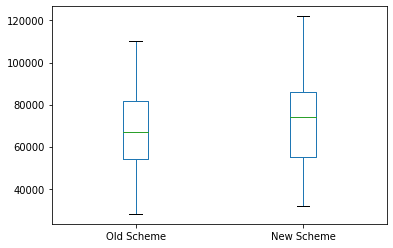

In [25]:
DF[['Old Scheme','New Scheme']].plot(kind='box')

# What conclusion does the test (p-value) lead to? (2.5 points)

p value is 0.131 and it is greater than 5% level of significance
So the statistical decision is to can't reject the null hypothesis at 5% level of significance.
So there is not sufficient evidence to reject the null hypothesis that new scheme has significantly raised outputs.

# Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:

# a) The probability of a type 1 error? (2.5 points)

Null Hypothesis      H0: Un-Uo<=5000
Alternate Hypothesis Ha: Un>Uo+5000 => Un-Uo > 5000

Type I error = P(Reject Null Hypothesis(H0)|H0 is true)
Type II error = P(not Reject Null Hypothesis(H0)|H0 is false)
Power = 1-Type II error 

In [26]:
OldScheme=DF.iloc[:,1].values
NewScheme=DF.iloc[:,2].values

In [27]:
dif=NewScheme-OldScheme

In [28]:
Xbar=dif.mean()
n=30
u = 5000
s=np.std(dif,ddof=1)
se=s/(np.sqrt(30))
print('Xbar = ',Xbar)
print('se = ',se)
t_stat=(Xbar-u)/(se)
print('t-stat',t_stat)
p_value=2*stats.t.cdf(Xbar,df=n-1,loc=5000,scale=se)
print('p-value',p_value)

Xbar =  4000.0
se =  2570.8355455569017
t-stat -0.38897859558860937
p-value 0.7001334912613286


In [33]:
print('What is the right side critical value?')
print(stats.t.isf(0.025,df=n-1,loc=u,scale=se))

What is the right side critical value?
10257.949062821375


In [32]:
print('What is the left side critical value?')
print(stats.t.isf(0.975,df=n-1,loc=u,scale=se))

What is the critical value?
-257.94906282137435


Type I error = P(Reject Null Hypothesis(H0)|H0 is true)
P(Xbar>9368.2|Xbar=5000)=P(Z>((9368.2-5000)/se)) = P(Type I error)

In [40]:
k=((10257.949062821375-5000)/se)
k

2.0452296421327034

In [41]:
P_Z_greater_than_k = 1-stats.norm.cdf(1.6991363012501637)
print('Type I error = ',P_Z_greater_than_k)

Type I error =  0.04464675248274774


# b) What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)

In [36]:
2*stats.t.cdf(Xbar,df=29,loc=u,scale=se) #p-value 

0.7001334912613286

OR

In [37]:
ttest_1samp(dif,5000)

Ttest_1sampResult(statistic=-0.3889785955886094, pvalue=0.7001334912613286)

In [ ]:
# p-value is greater than 0.05 => Cant reject null hypothesis

# c) Power of the test (5 points)

(Differences in means)/(Pooled standard deviation)

In [38]:
(np.mean(NewScheme) - np.mean(OldScheme)) / np.sqrt(((30-1)*np.var(OldScheme) + (30-1)*np.var(NewScheme)) / 30+30-2)

0.13102028811290178

Power of the test

In [39]:
print(ttest_power(0.13102028811290178, nobs=30, alpha=0.05, alternative="two-sided"))

0.10675935190324402
